# A) Load data

In [2]:
import pandas as pd

df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# B) EDA

In [3]:
df.info()
df.isna().sum()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# C) Menentukan fitur clustering

In [5]:
cluster_cols = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
X = df[cluster_cols].copy()

# D) Standardisasi

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# E) Elbow Method

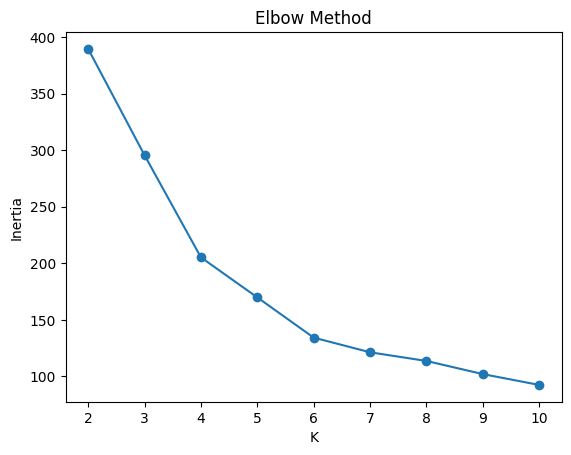

In [7]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertias = []
K_range = range(2, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init="auto")
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.figure()
plt.plot(list(K_range), inertias, marker="o")
plt.title("Elbow Method")
plt.xlabel("K")
plt.ylabel("Inertia")
plt.show()

# F) Silhouette Score

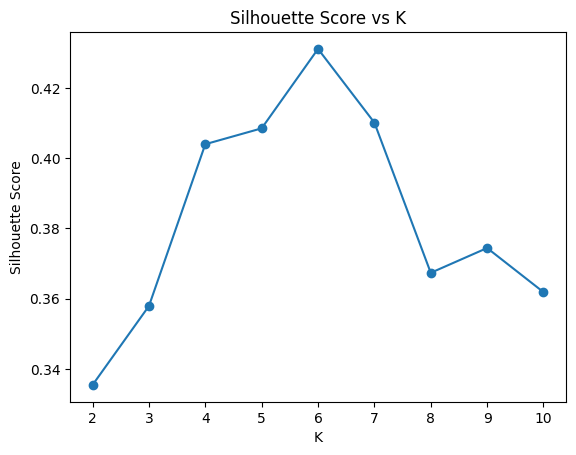

[(2, 0.33547192894004574),
 (3, 0.3579234303882264),
 (4, 0.4039582785148566),
 (5, 0.40846873777345605),
 (6, 0.43106526216603014),
 (7, 0.410091114520974),
 (8, 0.3673663165322295),
 (9, 0.37442148555078425),
 (10, 0.36186970479722974)]

In [9]:
from sklearn.metrics import silhouette_score

sil_scores = []
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init="auto")
    labels = km.fit_predict(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, labels))

plt.figure()
plt.plot(list(K_range), sil_scores, marker="o")
plt.title("Silhouette Score vs K")
plt.xlabel("K")
plt.ylabel("Silhouette Score")
plt.show()

list(zip(list(K_range), sil_scores))

# G) Train KMeans final

In [10]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
labels = kmeans.fit_predict(X_scaled)

df_clustered = df.copy()
df_clustered["Cluster"] = labels
df_clustered.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


# H) Plot cluster

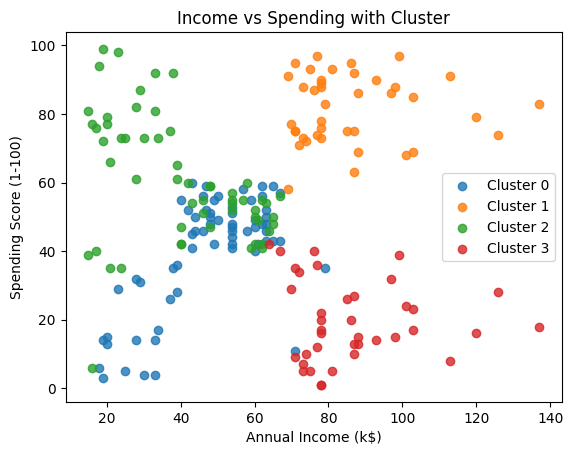

In [11]:
plt.figure()
for c in sorted(df_clustered["Cluster"].unique()):
    part = df_clustered[df_clustered["Cluster"] == c]
    plt.scatter(part["Annual Income (k$)"], part["Spending Score (1-100)"], label=f"Cluster {c}", alpha=0.8)

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Income vs Spending with Cluster")
plt.legend()
plt.show()

# I) Regresi

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

feature_cols = ["Age", "Annual Income (k$)", "Cluster"]
target_col = "Spending Score (1-100)"

X_reg = df_clustered[feature_cols]
y_reg = df_clustered[target_col]

X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

reg = RandomForestRegressor(n_estimators=300, random_state=42)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5
r2 = r2_score(y_test, y_pred)

(mae, rmse, r2)

(8.952245833333333, 12.885568417864462, 0.6633730568253465)